# Simple EDA
### 1. 클래스 별 데이터 개수 체크
: 데이터 불균형 확인
### 2. 중복 데이터 여부 체크
: 중복 데이터 존재
### 3. tokenizer 적용 후 문장 당 단어 개수 체크
: 산술 평균으로 계산 시 평균 20개 단어가 존재
### 4. 문장 당 단어 개수 시각화
: 그래프 참조
### 5. 단어 개수가 32개 이하인 문장의 비율 체크
: 전체의 약 86%

In [1]:
from transformers import ElectraTokenizer
import matplotlib.pyplot as plt
import numpy as np

# ============================================================================
# 1.
train_y = []
with open("./inputs/train_label", 'rt', encoding='UTF-8') as f:
    for i in f:
        train_y.append(i[:-1])

dic = {}
for i in range(1, 10 + 1):
    dic[i] = 0

for i in train_y:
    dic[int(i)] += 1
print("클래스 별 데이터 개수 체크")
print(dic)
print()


# ============================================================================
# 2.
train_x = []
with open("./inputs/train_data", 'rt', encoding='UTF-8') as f:
    for i in f:
        train_x.append(i[:-1])

# 데이터 중 중복되는 문장이 있음
print("데이터 중복 체크")
print("len(train_x)", len(train_x))
print("len(set(train_x))", len(set(train_x)))
print()

train_x = list(set(train_x))

# ============================================================================
# 3.
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")
print(tokenizer.tokenize(train_x[1]))
x = [len(tokenizer.tokenize(i)) for i in train_x]
print("tokenizer 이후 평균 문장 당 단어 개수 :", sum(x) / len(x))


length_dic = {}
for i in x:
    if i not in length_dic:
        length_dic[i] = 1
    else:
        length_dic[i] += 1

print("len(length_dic)", len(length_dic))

클래스 별 데이터 개수 체크
{1: 919251, 2: 138613, 3: 143429, 4: 164124, 5: 281436, 6: 367265, 7: 538344, 8: 868355, 9: 982114, 10: 4597069}

데이터 중복 체크
len(train_x) 9000000
len(set(train_x)) 8430733

['ㅈ', 'ㅣ', '루', '한', '부분', '##도', '이', '##ㅛ', '##지만', '##자', '##밌', '##게', '잘', '뷰', '##ㅏ', '##어요', '##잔', '##인', '##한', '장면', '##도', '많', '##음', '##한', '##석', '##규', '김', '##래', '##원', '연기', '##는', '굿', '프리', '##즌', '볼', '##만', '해', '##류', 'ㅈ', 'ㅣ', '루', '한', '부자', '##밌', '##게', '잘', '뷰', '##ㅏ', '##어요', '##잔', '##인', '##한', '장면', '##도', '많', '##음', '##한', '##석', '##규', '김', '##래', '##원', '연기', '##는', '굿', '굿', '프리', '##즌', '볼', '##만', '해', '##류']
tokenizer 이후 평균 문장 당 단어 개수 : 20.44200166225167
len(length_dic) 142


len(inputs) 142
len(y) 142
tokenizer 이후 1개 문장 당 단어 개수 분포


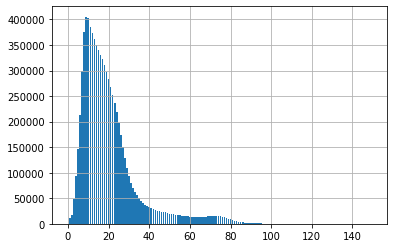

In [2]:
# ============================================================================
# 4.
temp = [(i, length_dic[i]) for i in length_dic]
temp = sorted(temp, key=lambda x: x[0])

inputs = [i[0] for i in temp]
y = [i[1] for i in temp]

print("len(inputs)", len(inputs))
print("len(y)", len(y))

print("tokenizer 이후 1개 문장 당 단어 개수 분포")
plt.bar(inputs, y)
plt.grid(True)
plt.show()

In [3]:
# ============================================================================
# 5.
num = 0
for i in y[:32]:
    num += i
print("tokenizer 이후 32개 이하 단어 포함 비율 :", num / sum(y))

tokenizer 이후 32개 이하 단어 포함 비율 : 0.8627583153208623
